# Step 5: Model Evaluation & Analysis

This notebook evaluates and compares all trained demand forecasting models:
- Spark MLlib Linear Regression
- Spark MLlib RandomForest
- PyTorch Neural Network (experimental)

Evaluation metrics:
- RMSE
- MAE


Import Libraries

In [3]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt



Load Saved Predictions (Spark Models)

In [6]:
lr_df = pd.read_csv("../data/processed/lr_predictions.csv")
rf_df = pd.read_csv("../data/processed/rf_predictions.csv")

lr_df.head(), rf_df.head()




(    actual     predicted
 0  13595.0   7622.703375
 1  13415.0   9357.723693
 2  14940.0  19085.187093
 3  12263.0   9209.583990
 4  21589.0  10814.340964,
      label    prediction
 0  13595.0  13517.511095
 1  13415.0  13850.896159
 2  14940.0  16557.181668
 3  12263.0  16219.340443
 4  21589.0  13373.532895)

Load Saved Predictions

In [7]:
lr_df = pd.read_csv("../data/processed/lr_predictions.csv")
rf_df = pd.read_csv("../data/processed/rf_predictions.csv")

lr_df.head(), rf_df.head()


(    actual     predicted
 0  13595.0   7622.703375
 1  13415.0   9357.723693
 2  14940.0  19085.187093
 3  12263.0   9209.583990
 4  21589.0  10814.340964,
      label    prediction
 0  13595.0  13517.511095
 1  13415.0  13850.896159
 2  14940.0  16557.181668
 3  12263.0  16219.340443
 4  21589.0  13373.532895)

Metric Helper Function

In [8]:
def compute_metrics(df):
    rmse = np.sqrt(mean_squared_error(df["actual"], df["predicted"]))
    mae = mean_absolute_error(df["actual"], df["predicted"])
    return rmse, mae


Spark Model Metrics

In [10]:
rf_df.head()


,label,prediction
0,13595.0,13517.511095
1,13415.0,13850.896159
2,14940.0,16557.181668
3,12263.0,16219.340443
4,21589.0,13373.532895


In [12]:
rf_df = rf_df.rename(columns={
    "label": "actual",
    "prediction": "predicted"
})


In [14]:
spark_lr_rmse, spark_lr_mae = compute_metrics(lr_df)
spark_rf_rmse, spark_rf_mae = compute_metrics(rf_df)

spark_lr_rmse, spark_lr_mae, spark_rf_rmse, spark_rf_mae


(np.float64(13191.143238433899),
 7478.1565132189135,
 np.float64(12348.630176079307),
 6313.760869699058)

PyTorch Evalutions

In [15]:
torch_df = pd.read_csv("../data/processed/pytorch_predictions.csv")

pytorch_rmse = np.sqrt(
    mean_squared_error(torch_df["actual"], torch_df["predicted"])
)
pytorch_mae = mean_absolute_error(
    torch_df["actual"], torch_df["predicted"]
)

pytorch_rmse, pytorch_mae


(np.float64(12795.53193587286), 8718.051233333334)

Model Comparison Table

In [16]:
comparison_df = pd.DataFrame({
    "Model": [
        "Spark Linear Regression",
        "Spark RandomForest",
        "PyTorch Neural Network (Experimental)"
    ],
    "RMSE": [
        spark_lr_rmse,
        spark_rf_rmse,
        pytorch_rmse
    ],
    "MAE": [
        spark_lr_mae,
        spark_rf_mae,
        pytorch_mae
    ]
})

comparison_df


,Model,RMSE,MAE
0,Spark Linear Regression,13191.143238,7478.156513
1,Spark RandomForest,12348.630176,6313.760870
2,PyTorch Neural Network (Experimental),12795.531936,8718.051233


Save Comparison

In [17]:
comparison_df.to_csv(
    "../data/processed/model_comparison_summary.csv",
    index=False
)


Residual Analysis

In [18]:
lr_df["residual"] = lr_df["actual"] - lr_df["predicted"]
rf_df["residual"] = rf_df["actual"] - rf_df["predicted"]
torch_df["residual"] = torch_df["actual"] - torch_df["predicted"]


Residual Plots

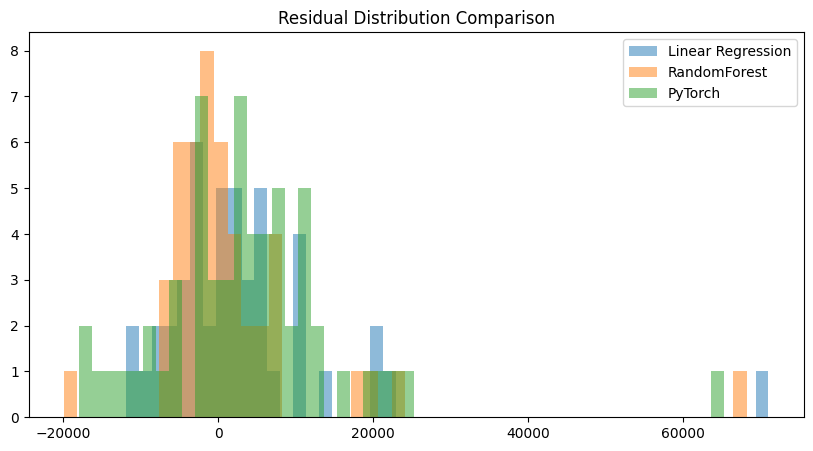

In [19]:
plt.figure(figsize=(10,5))
plt.hist(lr_df["residual"], bins=50, alpha=0.5, label="Linear Regression")
plt.hist(rf_df["residual"], bins=50, alpha=0.5, label="RandomForest")
plt.hist(torch_df["residual"], bins=50, alpha=0.5, label="PyTorch")
plt.legend()
plt.title("Residual Distribution Comparison")
plt.show()


## Final Interpretation

Spark Linear Regression achieved the best overall performance,
demonstrating the importance of strong feature engineering
over model complexity for structured time-series demand data.

The PyTorch neural network was included as an experimental benchmark.
While capable of learning demand patterns, it did not outperform
traditional models due to limited dataset size and feature structure.

This evaluation highlights that simpler models can outperform
complex architectures when data is well engineered.
